In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt



In [2]:
from ShAReD_Net.configure import config

cam_transform = config.dataset.cam_transform
inverse_cam_transforme = config.dataset.inverse_cam_transforme


config.dataset.IMG_PATH = "/dataset/jta/images_jpg"
config.dataset.ANNO_PATH = "/dataset/jta/new_image_annotations"

config.checkpoint.path = "/tf/pose3D/checkpoints"
config.tensorboard.path = "/tf/pose3D/logdir"



In [3]:
#TODO TEST
print(tf.matmul(cam_transform, inverse_cam_transforme))

tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]], shape=(3, 3), dtype=float32)


In [4]:
data_split = "train"

In [5]:
cut_dist = 10

In [6]:
import ShAReD_Net.data.transform.transform as transform

In [7]:
img_poses_ds = config.dataset.create_dataset(data_split)

img_poses_poss_ds = transform.create_img_poses_poss_dataset(img_poses_ds)
imgcut_poses_poss_ds = transform.create_imgcut_poses_poss_dataset(img_poses_poss_ds, cut_dist)
imgcut_imgposes_imgposs_ds = transform.create_imgcut_imgposes_imgposs_dataset(imgcut_poses_poss_ds)
imgcut_cutposes_cutposs_ds = transform.create_imgcut_cutposes_cutposs_dataset(imgcut_imgposes_imgposs_ds, cut_dist)
crop_ds = transform.create_croped_dataset(imgcut_cutposes_cutposs_ds)
filtered_cutposes_cutposs_ds = transform.create_filtered_cutposes_cutposs_dataset(crop_ds)
imgcut_cutposes_cutposs_heatmap_indices_ds = transform.create_imgcut_cutposes_cutposs_heatmap_indices_dataset(filtered_cutposes_cutposs_ds, cut_dist)
imgcut_cutposes_cutposs_heatmap_indices_weights_ds = transform.create_imgcut_cutposes_cutposs_heatmap_indices_weights_dataset(imgcut_cutposes_cutposs_heatmap_indices_ds)
imgcut_relposes_roiindices_heatmap_indices_weights_ds = transform.create_imgcut_relposes_roiindices_heatmap_indices_weights_dataset(imgcut_cutposes_cutposs_heatmap_indices_weights_ds, cut_dist)
imgcut_relposes_roiindices_heatmap_indices_weights_poseindexes_ds = transform.create_imgcut_relposes_roiindices_heatmap_indices_weights_poseindexes_dataset(imgcut_relposes_roiindices_heatmap_indices_weights_ds)
batchable_ds = transform.create_batchable_dataset(imgcut_relposes_roiindices_heatmap_indices_weights_poseindexes_ds,cut_dist)



Roi_Extractor [TensorShape([1, None, None, 3]), TensorShape([None, 3])]


In [8]:
take = imgcut_cutposes_cutposs_ds.take(1)
op = tf.data.experimental.get_next_as_optional(iter(imgcut_cutposes_cutposs_ds))
op.get_value()


(<tf.Tensor: shape=(596, 1061, 3), dtype=float32, numpy=
 array([[[0.41683465, 0.38938367, 0.35016796],
         [0.41905558, 0.3916046 , 0.35238892],
         [0.4225066 , 0.39505565, 0.3558399 ],
         ...,
         [0.10368492, 0.21785676, 0.16175047],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],
 
        [[0.4005773 , 0.3731263 , 0.3339106 ],
         [0.40521514, 0.3777641 , 0.33854842],
         [0.41283906, 0.38538805, 0.34617236],
         ...,
         [0.12103131, 0.23167312, 0.17682922],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],
 
        [[0.39891315, 0.37146217, 0.33224642],
         [0.40462887, 0.37717783, 0.33796212],
         [0.4141848 , 0.38673383, 0.34751815],
         ...,
         [0.10819626, 0.2135535 , 0.1604923 ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],
 
        ...,
 
        [[0.52102226, 0.5397224

In [9]:
tf.data.experimental.get_single_element(take)


(<tf.Tensor: shape=(596, 1061, 3), dtype=float32, numpy=
 array([[[0.01191438, 0.02367909, 0.04328693],
         [0.01392355, 0.02568825, 0.0452961 ],
         [0.01753002, 0.02929473, 0.04890257],
         ...,
         [0.35686278, 0.46274513, 0.4039216 ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],
 
        [[0.01180117, 0.02356587, 0.04317372],
         [0.0120553 , 0.02382001, 0.04342785],
         [0.01417063, 0.02593534, 0.04554318],
         ...,
         [0.35686272, 0.4627451 , 0.4039216 ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],
 
        [[0.01575582, 0.02752053, 0.04712837],
         [0.01575582, 0.02752053, 0.04712838],
         [0.01500582, 0.02677053, 0.04637837],
         ...,
         [0.35686272, 0.4627451 , 0.40392157],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],
 
        ...,
 
        [[0.07812883, 0.0316751

In [10]:
cutdist_ds = transform.create_cutdist_dataset()
interleaved_multiscale_ds = transform.create_dataset(data_split, 2)

tf.Tensor([421 421   3], shape=(3,), dtype=int32)
tf.Tensor([421 421   3], shape=(3,), dtype=int32)
tf.Tensor([421 421   3], shape=(3,), dtype=int32)
tf.Tensor([421 421   3], shape=(3,), dtype=int32)
tf.Tensor([421 421   3], shape=(3,), dtype=int32)
tf.Tensor([421 421   3], shape=(3,), dtype=int32)
tf.Tensor([421 421   3], shape=(3,), dtype=int32)
tf.Tensor([421 421   3], shape=(3,), dtype=int32)
tf.Tensor([421 421   3], shape=(3,), dtype=int32)
tf.Tensor([421 421   3], shape=(3,), dtype=int32)
tf.Tensor([421 421   3], shape=(3,), dtype=int32)
tf.Tensor([421 421   3], shape=(3,), dtype=int32)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tf.Tensor([421 421   3], shape=(3,), dtype=int32)
tf.Tensor([421 421   3], shape=(3,), dtype=int32)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tf.Tensor([421 421   3], shape=(3,), dtype=int32)
tf.Tensor([421 421   3], shape=(3,), dtype=int32)
tf.Tensor([421 421   3], shape=(3,), dtype=int32)
tf.Tensor([421 421   3], shape=(3,), dtype=int32)
tf.Tensor([421 421   3], shape=(3,), dtype=int32)
tf.Tensor([421 421   3], shape=(3,), dtype=int32)
tf.Tensor([421 421   3], shape=(3,), dtype=int32)
tf.Tensor([421 421   3], shape=(3,), dtype=int32)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


tf.Tensor([421 421   3], shape=(3,), dtype=int32)
tf.Tensor([421 421   3], shape=(3,), dtype=int32)
tf.Tensor([421 421   3], shape=(3,), dtype=int32)
tf.Tensor([421 421   3], shape=(3,), dtype=int32)
tf.Tensor([421 421   3], shape=(3,), dtype=int32)
tf.Tensor([421 421   3], shape=(3,), dtype=int32)
tf.Tensor([421 421   3], shape=(3,), dtype=int32)
tf.Tensor([421 421   3], shape=(3,), dtype=int32)
tf.Tensor([421 421   3], shape=(3,), dtype=int32)
tf.Tensor([421 421   3], shape=(3,), dtype=int32)
tf.Tensor([421 421   3], shape=(3,), dtype=int32)
tf.Tensor([421 421   3], shape=(3,), dtype=int32)
tf.Tensor([421 421   3], shape=(3,), dtype=int32)
tf.Tensor([421 421   3], shape=(3,), dtype=int32)
tf.Tensor([421 421   3], shape=(3,), dtype=int32)
tf.Tensor([421 421   3], shape=(3,), dtype=int32)
tf.Tensor([421 421   3], shape=(3,), dtype=int32)
tf.Tensor([421 421   3], shape=(3,), dtype=int32)


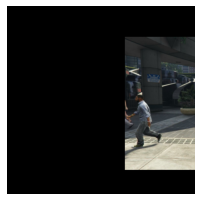

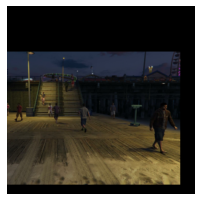

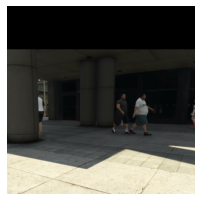

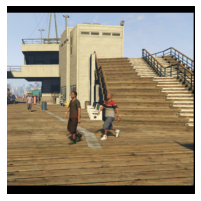

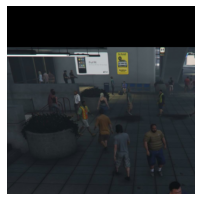

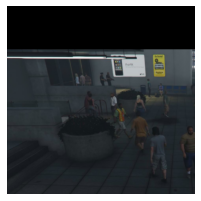

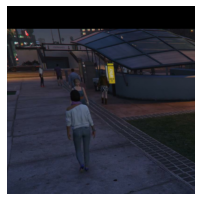

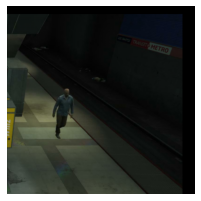

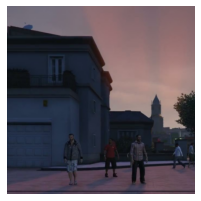

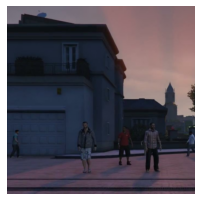

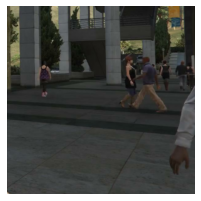

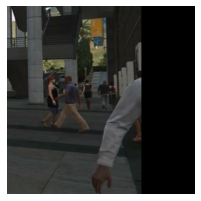

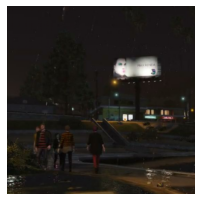

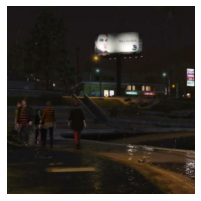

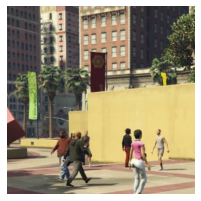

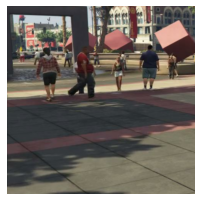

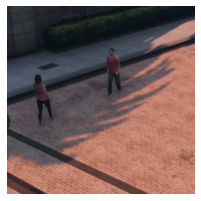

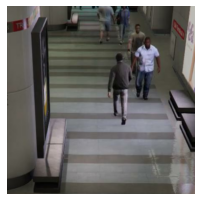

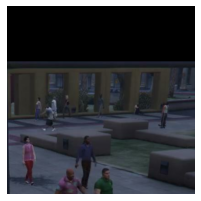

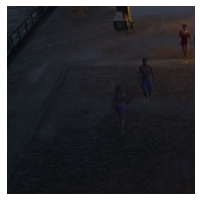

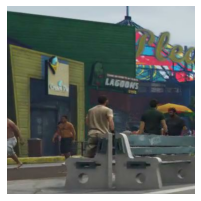

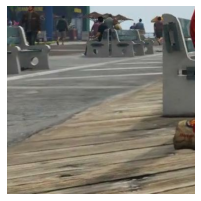

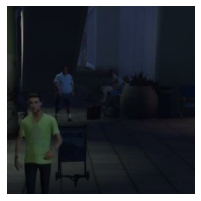

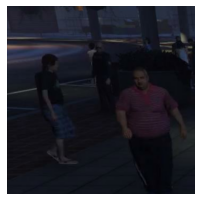

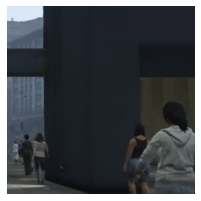

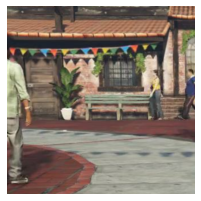

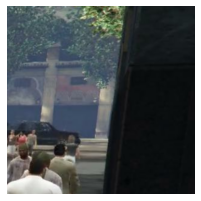

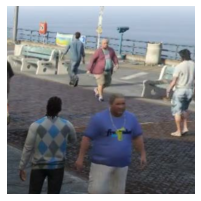

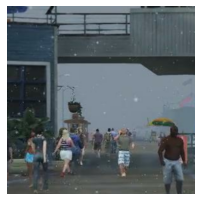

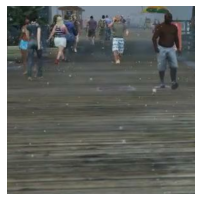

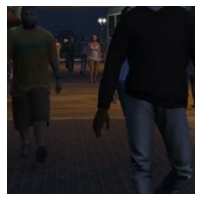

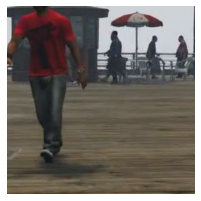

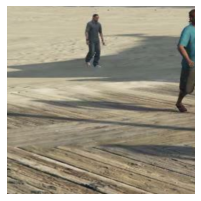

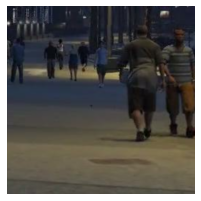

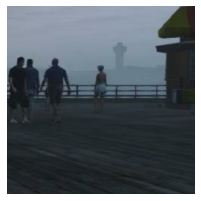

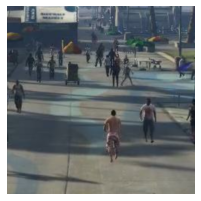

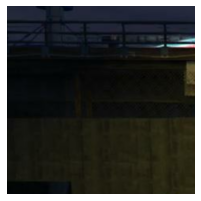

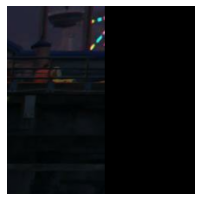

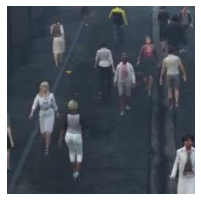

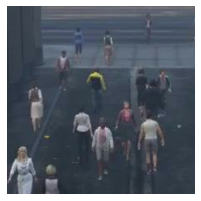

In [11]:
def show_img(image):
    print(tf.shape(image))

    plt.figure(figsize=(40,20))

    ax = plt.subplot(5,5,1)
    plt.imshow(image)
    plt.axis('off')


for img, (heatmap, weights), roi_indexes, (rel_pose, pose_indexes), cut_dist in interleaved_multiscale_ds.take(40):
    show_img(img)
    

tf.Tensor([ 596 1061    3], shape=(3,), dtype=int32) tf.Tensor([1 3], shape=(2,), dtype=int32) tf.Tensor([ 1 15  3], shape=(3,), dtype=int32)
[616.134521484375,316.3678894042969]
[614.9020385742188,322.7055358886719]
[617.2608642578125,354.8819274902344]
[608.4473266601562,327.7228088378906]
[623.1414184570312,328.15985107421875]
[603.1229248046875,342.0953369140625]
[625.658935546875,343.4278259277344]
[603.7977905273438,356.7897644042969]
[631.3212890625,356.8356018066406]
[613.79345703125,358.8119201660156]
[620.1814575195312,359.15020751953125]
[619.3594360351562,381.2761535644531]
[621.7495727539062,382.6561279296875]
[607.2061157226562,398.4821472167969]
[618.185546875,406.36944580078125]
[616.3583984375,355.61199951171875]


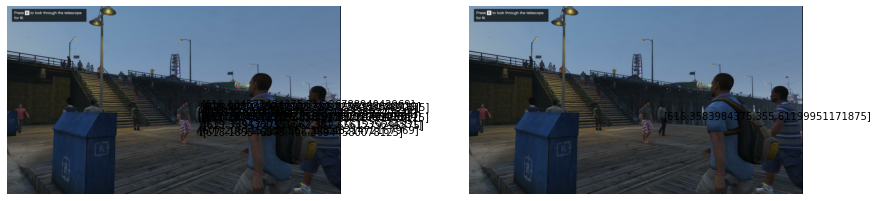

In [12]:
#TODO TEST CODE
#TEST
imgcut_cutposes_cutposs_ds_take = imgcut_cutposes_cutposs_ds.take(1)
img, poses_img, poss_img = tf.data.experimental.get_single_element(imgcut_cutposes_cutposs_ds_take)

def show_img_cut(image, poss, poses):
    print(tf.shape(image),tf.shape(poss),tf.shape(poses))

    plt.figure(figsize=(40,20))

    ax = plt.subplot(5,5,1)
    plt.imshow(image)
    for pose in poses:
        for joint in pose:
            text = f"[{joint[0]},{joint[1]}]"
            print(text)
            plt.text(joint[0],joint[1], text)
    plt.axis('off')

    ax = plt.subplot(5,5,2)
    plt.imshow(image)
    for pos in poss:
        text = f"[{pos[0]},{pos[1]}]"
        print(text)
        plt.text(pos[0],pos[1], text)
    plt.axis('off')

show_img_cut(img, poss_img, poses_img)

tf.Tensor([421 421   3], shape=(3,), dtype=int32) tf.Tensor([2 3], shape=(2,), dtype=int32) tf.Tensor([ 2 15  3], shape=(3,), dtype=int32)
tf.Tensor([421 421   3], shape=(3,), dtype=int32) tf.Tensor([1 3], shape=(2,), dtype=int32) tf.Tensor([ 1 15  3], shape=(3,), dtype=int32)


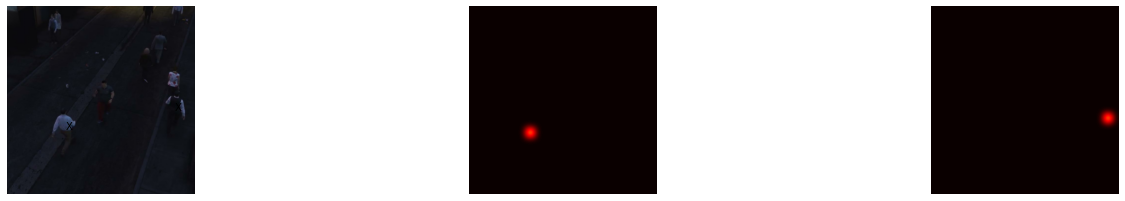

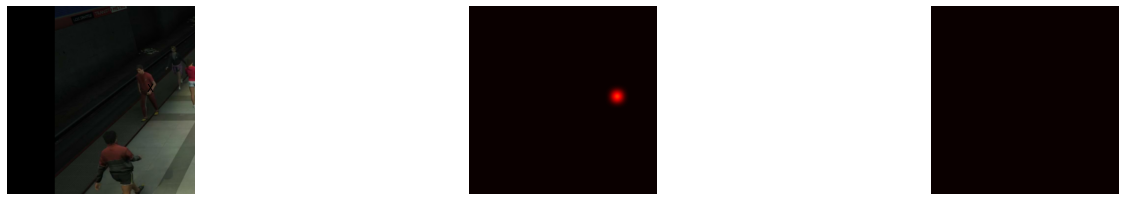

In [13]:
#TODO TEST CODE
#TEST

def show_img_and_hm(image, heatmap):
    print(tf.shape(image),tf.shape(poss),tf.shape(poses))

    plt.figure(figsize=(40,20))

    ax = plt.subplot(5,5,1)
    plt.imshow(image)
    for pos in poss:
        plt.text(pos[0],pos[1], "X")
    plt.axis('off')

    ax = plt.subplot(5,5,2)
    plt.imshow(heatmap[:,:,0], cmap="hot", interpolation="bicubic")
    plt.axis('off')

    ax = plt.subplot(5,5,3)
    plt.imshow(heatmap[:,:,1], cmap="hot", interpolation="bicubic")
    plt.axis('off')

for i in range(2):
    imgcut_cutposes_cutposs_heatmap_ds_take = imgcut_cutposes_cutposs_heatmap_indices_ds.take(1)
    img, poses, poss, heatmap, indix = tf.data.experimental.get_single_element(imgcut_cutposes_cutposs_heatmap_ds_take)
    show_img_and_hm(img, heatmap)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tf.Tensor([421 421   3], shape=(3,), dtype=int32) tf.Tensor([1 3], shape=(2,), dtype=int32) tf.Tensor([ 1 15  3], shape=(3,), dtype=int32)


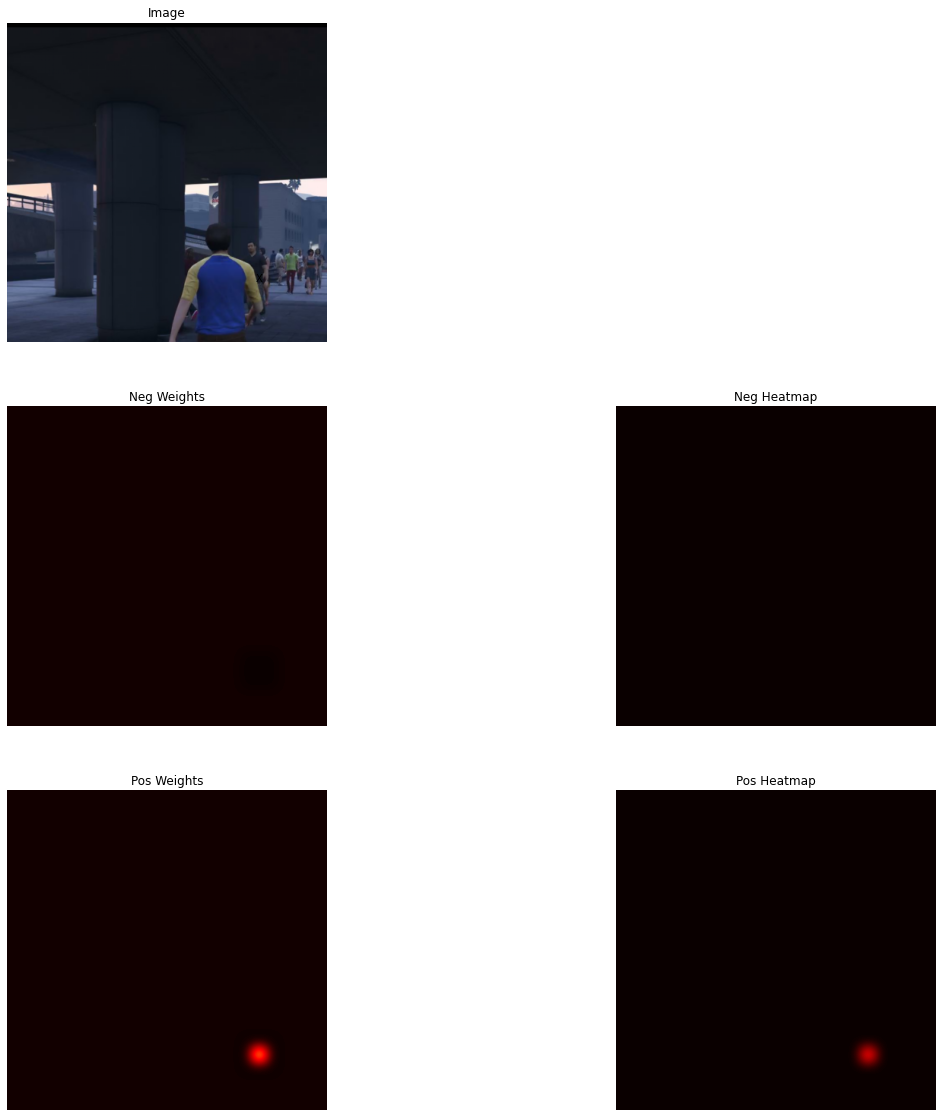

In [14]:
#TODO TEST CODE
#TEST

def show_img_and_hm_w(image, heatmap, weights):
    print(tf.shape(image),tf.shape(poss),tf.shape(poses))

    plt.figure(figsize=(20,20))

    ax = plt.subplot(3,2,1)
    plt.imshow(image)
    for pos in poss:
        plt.text(pos[0],pos[1], "X")
    plt.title('Image')
    plt.axis('off')

    ax = plt.subplot(3,2,3)
    plt.imshow(weights[:,:,0], cmap="hot", interpolation="bicubic", clim=(0.0, 1.0))
    plt.title('Neg Weights')
    plt.axis('off')

    ax = plt.subplot(3,2,4)
    plt.title('Neg Heatmap')
    plt.imshow(heatmap[:,:,0], cmap="hot", interpolation="bicubic", clim=(0.0, 1.0))
    plt.axis('off')

    ax = plt.subplot(3,2,5)
    plt.title('Pos Weights')
    plt.imshow(weights[:,:,1], cmap="hot", interpolation="bicubic", clim=(0.0, 1.0))
    plt.axis('off')

    ax = plt.subplot(3,2,6)
    plt.title('Pos Heatmap')
    plt.imshow(heatmap[:,:,1], cmap="hot", interpolation="bicubic", clim=(0.0, 1.0))
    plt.axis('off')

imgcut_cutposes_cutposs_heatmap_weights_ds_take = imgcut_cutposes_cutposs_heatmap_indices_weights_ds.take(1)
img, poses, poss, heatmap, index, weights = tf.data.experimental.get_single_element(imgcut_cutposes_cutposs_heatmap_weights_ds_take)
show_img_and_hm_w(img, heatmap, weights)

Roi_Extractor [TensorShape([1, 421, 421, 3]), TensorShape([1, 3])]
(1, 141, 141, 3)
[76.68328857421875,21.7958984375]
[74.02142333984375,28.872283935546875]
[67.0699462890625,65.78558349609375]
[64.222900390625,33.52520751953125]
[83.33056640625,33.3671875]
[66.2841796875,50.59344482421875]
[80.01629638671875,47.91778564453125]
[81.44970703125,58.6375732421875]
[81.93609619140625,64.59124755859375]
[60.66998291015625,70.26559448242188]
[71.10968017578125,70.82037353515625]
[51.6925048828125,93.75881958007812]
[79.75518798828125,95.28424072265625]
[41.12652587890625,112.0548095703125]
[84.08587646484375,121.37417602539062]


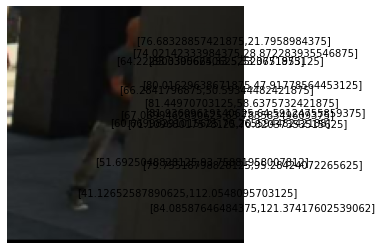

In [15]:
def show_img_and_hm_w(images, relposes):
    plt.figure(figsize=(20,20))
    for i, (pose_imge, img_pose) in enumerate(zip(images,relposes)):
        ax = plt.subplot(4,4,i+1)
        plt.imshow(pose_imge)
        for joint in img_pose:
            text = f"[{joint[0]},{joint[1]}]"
            print(text)
            plt.text(joint[0],joint[1], text)
        plt.axis('off')

imgcut_relposes_roiindices_heatmap_indices_weights_ds_take = imgcut_relposes_roiindices_heatmap_indices_weights_ds.take(1)
imgcut, relposes, roiindices, heatmap, indices, weights = tf.data.experimental.get_single_element(imgcut_relposes_roiindices_heatmap_indices_weights_ds_take)

import ShAReD_Net.model.modules.slim as slim_modules

roi_size = np.asarray(config.model.roi_size) * config.model.img_downsampling + 1
        
roi_extractor = slim_modules.Roi_Extractor(roi_size=roi_size)
roiindices_img = roiindices * config.model.img_downsampling
new_indexes = np.empty([roiindices_img.shape[0], roiindices_img.shape[1]+1], dtype=np.int32)
new_indexes[:,1:] = roiindices_img
new_indexes[:,0] = 0


imgcut_batched = imgcut[None,...]
pose_imges = roi_extractor([imgcut_batched, new_indexes])
print(pose_imges.shape)

img_poses = relposes[:,:,:-1] + roi_size/2

show_img_and_hm_w(pose_imges, img_poses)

Roi_Extractor [TensorShape([1, 421, 421, 3]), TensorShape([1, 3])]
(1, 141, 141, 3)
[68,20]
[64,28]
[64,64]
[60,32]
[64,32]
[60,52]
[64,48]
[60,68]
[76,64]
[64,72]
[64,68]
[80,96]
[56,96]
[84,124]
[48,124]


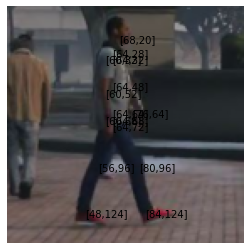

In [30]:
def show_img_and_hm_w(images, relposes):
    plt.figure(figsize=(20,20))
    for i, (pose_imge, img_pose) in enumerate(zip(images,relposes)):
        ax = plt.subplot(4,4,i+1)
        plt.imshow(pose_imge)
        for joint in img_pose:
            text = f"[{joint[0]},{joint[1]}]"
            print(text)
            plt.text(joint[0]-2,joint[1]+1, text)
        plt.axis('off')

imgcut_relposes_roiindices_heatmap_indices_weights_poseindexes_ds_ds_take = imgcut_relposes_roiindices_heatmap_indices_weights_poseindexes_ds.take(1)
imgcut, relposes, roiindices, heatmap, indices, weights, pose_indexes = tf.data.experimental.get_single_element(imgcut_relposes_roiindices_heatmap_indices_weights_poseindexes_ds_ds_take)

import ShAReD_Net.model.modules.slim as slim_modules

roi_size = np.asarray(config.model.roi_size) * config.model.img_downsampling + 1
        
roi_extractor = slim_modules.Roi_Extractor(roi_size=roi_size)
roiindices_img = roiindices * config.model.img_downsampling
new_indexes = np.empty([roiindices_img.shape[0], roiindices_img.shape[1]+1], dtype=np.int32)
new_indexes[:,1:] = roiindices_img
new_indexes[:,0] = 0


imgcut_batched = imgcut[None,...]
pose_imges = roi_extractor([imgcut_batched, new_indexes])
print(pose_imges.shape)

pose_indexes = pose_indexes[...,::-1] * config.model.img_downsampling

show_img_and_hm_w(pose_imges, pose_indexes)

(30, 2)
Roi_Extractor [TensorShape([1, 421, 421, 3]), TensorShape([30, 3])]
(30, 35, 35, 3)


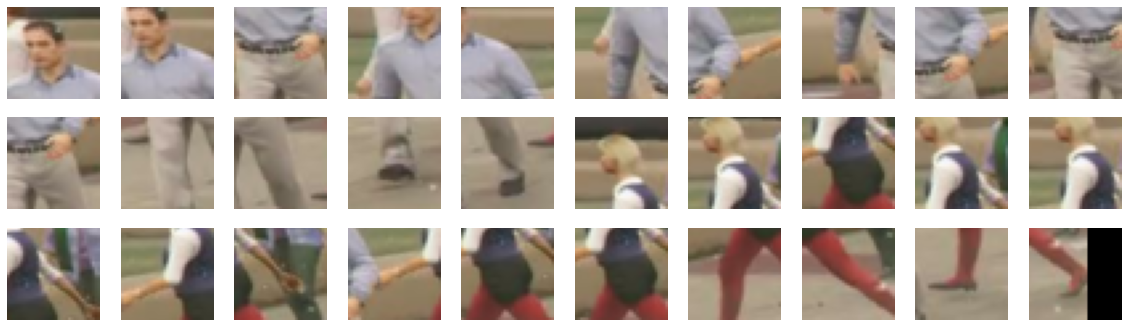

In [105]:
def show_img_pose(images):
    plt.figure(figsize=(20,20))
    for i, pose_imge in enumerate(images):
        ax = plt.subplot(10,10,i+1)
        plt.imshow(pose_imge)
        #plt.text(config.model.roi_size[0]//2-2,config.model.roi_size[1]//2+1, "X")
        plt.axis('off')

imgcut_relposes_roiindices_heatmap_indices_weights_poseindexes_ds_ds_take = imgcut_relposes_roiindices_heatmap_indices_weights_poseindexes_ds.take(1)
imgcut, relposes, roiindices, heatmap, indices, weights, pose_indexes = tf.data.experimental.get_single_element(imgcut_relposes_roiindices_heatmap_indices_weights_poseindexes_ds_ds_take)

del slim_modules

import ShAReD_Net.model.modules.slim as slim_modules

roi_size = np.asarray(config.model.roi_size)
        
roi_extractor = slim_modules.Roi_Extractor(roi_size=roi_size)

roiindices_img = tf.reshape(pose_indexes + roiindices[:,None,:] - roi_size//2-1, [-1,2]) * config.model.img_downsampling

print(roiindices_img.shape)

new_indexes = np.empty([roiindices_img.shape[0], roiindices_img.shape[1]+1], dtype=np.int32)
new_indexes[:,1:] = roiindices_img
new_indexes[:,0] = 0

imgcut_batched = imgcut[None,...]
pose_imges = roi_extractor([imgcut_batched, new_indexes])
print(pose_imges.shape)

show_img_pose(pose_imges)

In [39]:
def batching(dataset, batch_size):
    batched_ds = dataset.batch(batch_size)

    def unragg(img, pos_stuff, roi_indexes, pose_stuff, cut_dist):
        rel_pose, pose_indexes = pose_stuff
        pos_heatmap, weights = pos_stuff

        def unragg_roi_indexes(indexes, row_length):
            new_indexes = np.empty([indexes.shape[0], indexes.shape[1]+1], dtype=np.int32)
            new_indexes[:,1:] = indexes
            i = 0
            b = 0
            for length in row_length[1]:
                index = indexes[i:int(i+length)]
                new_indexes[i:int(i+length),0] = b
                i += length
                b += 1
                
            return new_indexes
        
        def unragg_pose_indexes(indexes, row_length):
            new_indexes = np.empty([indexes.shape[0], indexes.shape[1], indexes.shape[-1]+1], dtype=np.int32)
            new_indexes[:,:,1:] = indexes
            i = 0
            b = 0
            for length in row_length[1]:
                index = indexes[i:int(i+length)]
                new_indexes[i:int(i+length),:,0] = b
                i += length
                b += 1
                
            return new_indexes

        roi_indexes_flat = tf.numpy_function(unragg_roi_indexes, [roi_indexes.flat_values, roi_indexes.nested_row_lengths()], Tout=roi_indexes.dtype)
        pose_indexes_flat = tf.numpy_function(unragg_pose_indexes, [pose_indexes.flat_values, pose_indexes.nested_row_lengths()], Tout=pose_indexes.dtype)

        rel_pose_flat =  rel_pose.flat_values

        return img, (pos_heatmap, weights), roi_indexes_flat, (rel_pose_flat, pose_indexes_flat), cut_dist

    unragged_ds = batched_ds.map(unragg).prefetch(100)
    return unragged_ds


Roi_Extractor [TensorShape([2, 421, 421, 3]), TensorShape([6, 3])]
(6, 141, 141, 3)
1


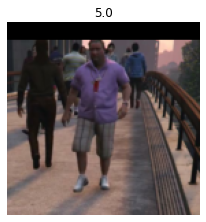

In [82]:
fig = plt.figure(figsize=(20,20))
j = 0
def show_img_and_hm_w_cut(images, cut_dist):
    global j
    for pose_imge, img_pose, cut in zip(images,relposes,cut_dist):
        j += 1
        ax = fig.add_subplot(4,5,j)
        ax.imshow(pose_imge)
        for joint in img_pose:
            ax.set_title(f"{cut}")
        ax.axis('off')
        print(j)

import ShAReD_Net.model.modules.slim as slim_modules

roi_size = np.asarray(config.model.roi_size) * config.model.img_downsampling + 1
        
roi_extractor = slim_modules.Roi_Extractor(roi_size=roi_size)

for img, (heatmap, weights), roi_indexes, (rel_pose, pose_indexes), cut_dist in batching(interleaved_multiscale_ds,2).take(1):
    
    roiindices_img = tf.concat([roi_indexes[:,0,None], roi_indexes[:,1:] * config.model.img_downsampling], 1)

    imgcut_batched = img
    pose_imges = roi_extractor([imgcut_batched, roiindices_img])
    print(pose_imges.shape)

    show_img_and_hm_w_cut(pose_imges, cut_dist)

In [18]:
roi_size = config.model.roi_size
img_downsampling = config.model.img_downsampling

image_crop_size = np.asarray(roi_size) * img_downsampling * 2 + 1
roi_extractor = slim_modules.Roi_Extractor(roi_size=image_crop_size)



def random_crop(imgcut, poses_cut, poss_cut):
    imgcut_batched = imgcut[None,...]
    offset_size = tf.cast(min(image_crop_size), tf.float32) / 3
    offsets = tf.random.uniform(tf.shape(poss_cut), minval=-offset_size, maxval=offset_size, dtype=tf.dtypes.float32)

    cut_index = tf.cast(poss_cut + offsets, tf.int32)[...,::-1]

    mask = tf.constant([[0, 1, 1]], tf.int32)

    cut_index = cut_index * mask

    pose_imges = roi_extractor([imgcut_batched, cut_index])

    poses = tf.repeat(poses_cut[None,...], tf.shape(cut_index)[0], axis=0)
    poss = tf.repeat(poss_cut[None,...], tf.shape(cut_index)[0], axis=0)

    center = tf.constant([[image_crop_size[1]//2, image_crop_size[0]//2, 0]], tf.float32)
    cut_pos = tf.cast(cut_index[...,::-1], tf.float32) - center
    cut_pos_poses = cut_pos[:,None,None,:]
    cut_pos_poss = cut_pos[:,None,:]

    new_poses = poses - cut_pos_poses
    new_poss = poss - cut_pos_poss


    dataset = tf.data.Dataset.from_tensor_slices((pose_imges, new_poses, new_poss))

    return dataset

def filter_poss_and_pose_crop_size(image, poses, poss):
    image_size = tf.cast(tf.shape(image)[0:2], poss.dtype)
    
    indexes = tf.where(tf.math.logical_and(
        tf.math.logical_and(poss[:,0] >= 0, poss[:,0] < image_size[1] - 1),
        tf.math.logical_and(poss[:,1] >= 0, poss[:,1] < image_size[0] - 1)))
    filtered_poss = tf.gather_nd(poss, indexes)
    filtered_poses = tf.gather_nd(poses, indexes)

    # for each keypoint filter person not fully in image
    for k in range(15):
        indexes = tf.where(tf.math.logical_and(
            tf.math.logical_and(filtered_poses[:,k,0] >= 0, filtered_poses[:,k,0] < image_size[1] - 1),
            tf.math.logical_and(filtered_poses[:,k,1] >= 0, filtered_poses[:,k,1] < image_size[0] - 1)))
        
        filtered_poss = tf.gather_nd(filtered_poss, indexes)
        filtered_poses = tf.gather_nd(filtered_poses, indexes)

    return image, filtered_poses, filtered_poss 

def create_croped_dataset(dataset):
    croped_ds = dataset.flat_map(random_crop)
    filtered_ds = croped_ds.map(filter_poss_and_pose_crop_size)
    return filtered_ds

Roi_Extractor [TensorShape([1, None, None, 3]), TensorShape([None, 3])]
tf.Tensor([281 281   3], shape=(3,), dtype=int32) tf.Tensor([1 3], shape=(2,), dtype=int32) tf.Tensor([ 1 15  3], shape=(3,), dtype=int32)
[108.87249755859375,138.52963256835938]
[109.39006042480469,145.51673889160156]
[107.97703552246094,182.39132690429688]
[96.5699462890625,149.1122283935547]
[122.67431640625,152.99676513671875]
[90.25505065917969,166.40179443359375]
[129.93783569335938,169.97927856445312]
[85.09906005859375,180.67840576171875]
[133.91708374023438,186.5595703125]
[102.5699462890625,187.7789306640625]
[114.07626342773438,187.02297973632812]
[101.90325927734375,215.11224365234375]
[104.94483947753906,211.171875]
[116.26467895507812,227.08010864257812]
[105.34715270996094,238.18161010742188]
[108.71907043457031,182.62478637695312,9.583999633789062]


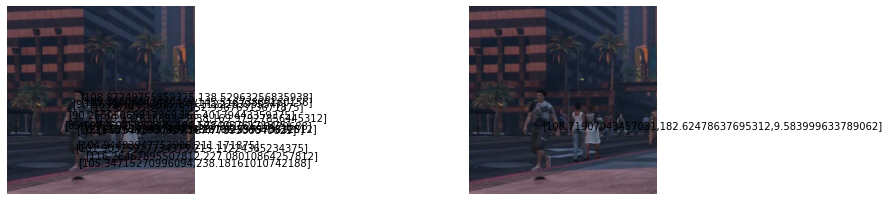

In [19]:
#TODO TEST CODE
#TEST
crop_ds = create_croped_dataset(imgcut_cutposes_cutposs_ds)

imgcut_cutposes_cutposs_ds_take = crop_ds.take(1)
img, poses_img, poss_img = tf.data.experimental.get_single_element(imgcut_cutposes_cutposs_ds_take)

def show_img_cut(image, poss, poses):
    print(tf.shape(image),tf.shape(poss),tf.shape(poses))

    plt.figure(figsize=(40,20))

    ax = plt.subplot(5,5,1)
    plt.imshow(image)
    for pose in poses:
        for joint in pose:
            text = f"[{joint[0]},{joint[1]}]"
            print(text)
            plt.text(joint[0],joint[1], text)
    plt.axis('off')

    ax = plt.subplot(5,5,2)
    plt.imshow(image)
    for pos in poss:
        text = f"[{pos[0]},{pos[1]},{pos[2]}]"
        print(text)
        plt.text(pos[0],pos[1], text)
    plt.axis('off')

show_img_cut(img, poss_img, poses_img)

In [20]:
pose_arr = tf.TensorArray(size=0,dtype=tf.float32,dynamic_size=True)
i = 0
for imgcut, relposes, roiindices, heatmap, indices, weights in imgcut_relposes_roiindices_heatmap_indices_weights_ds.take(1000):
    for img_pose in relposes:
        for joint in img_pose:
            pose_arr = pose_arr.write(i,joint)
            i+=1
            
agg_poses = pose_arr.stack()

(array([ 40.,  67.,  30.,  34.,  49., 121.,  79.,  65.,  13.,   2.]),
 array([-1.3699999 , -1.0839999 , -0.798     , -0.51199996, -0.22600003,
         0.05999994,  0.3459999 ,  0.63199985,  0.91799986,  1.2039998 ,
         1.4899998 ], dtype=float32),
 <a list of 10 Patch objects>)

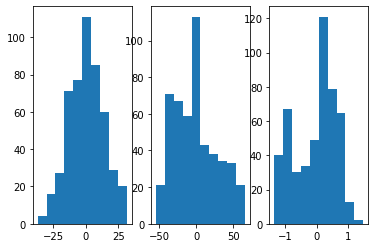

In [21]:
ax = plt.subplot(1,3,1)
plt.hist(agg_poses[:500,0])
ax = plt.subplot(1,3,2)
plt.hist(agg_poses[:500,1])
ax = plt.subplot(1,3,3)
plt.hist(agg_poses[:500,2])

In [22]:
meanp = tf.reduce_mean(tf.abs(agg_poses),axis=[0])
print(meanp)
maxp = tf.reduce_max(agg_poses,axis=[0])
print(maxp)
minp = tf.reduce_min(agg_poses,axis=[0])
print(minp)

tf.Tensor([ 9.664174  22.573378   0.5753207], shape=(3,), dtype=float32)
tf.Tensor([55.523132  72.827576   1.4899998], shape=(3,), dtype=float32)
tf.Tensor([-47.37937   -57.86653    -1.4899998], shape=(3,), dtype=float32)


In [23]:
def to_keypoints(img, detect_stuff, roi_indexes, pose_stuff, cut_dist):
    rel_pose, pose_indexes = pose_stuff
    return tf.sqrt(rel_pose[:,0]**2 + rel_pose[:,1]**2), cut_dist

In [24]:
import ShAReD_Net.data.transform.inverse_transform as inverse_transform

uncut_ds = inverse_transform.create_uncut_dataset(imgcut_cutposes_cutposs_ds)

In [25]:
#TODO TEST test if uncut_ds == cam_ds
take_uncut = uncut_ds.take(1)
img, poss, poses = tf.data.experimental.get_single_element(take_uncut)

# image poss, poses and uncut poss, poses should have matching entrys (some are filtered out)


uncut poss, poses [[610.774292 731.428467 9.286]
 [2011.33545 738.563293 9.07866764]] [[[621.30542 639.881348 9.48]
  [615.75885 650.335449 9.39]
  [606.839661 728.494629 9.2]
  ...
  [585.049133 804.297424 9.18]
  [622.548157 860.775391 9.35]
  [578.944214 851.047424 8.88]]

 [[2011.93481 635.277161 9.11]
  [2011.23596 654.32135 9.1]
  [2007.35156 730.734314 9.09]
  ...
  [1988.22681 805.565125 8.98]
  [2029.41272 870.43634 9.11]
  [1995.5603 870.259277 8.97]]]


In [26]:
real_ds1 = inverse_transform.create_uncut_dataset(imgcut_cutposes_cutposs_ds)
real_ds2 = inverse_transform.create_uncut_dataset(uncut_ds)

In [27]:
#TODO TEST test if uncut_ds == cam_ds
take_real = real_ds1.take(1)
img, poss, poses = tf.data.experimental.get_single_element(take_real)

# image poss, poses and uncut poss, poses should have matching entrys (some are filtered out)

uncut poss, poses [[954.061951 584.76 9.22866631]
 [1603.26892 587.342346 8.818]] [[[952.442871 482.630737 9.18]
  [954.554382 501.929352 9.2]
  [951.946899 577.66272 9.22]
  ...
  [962.964 657.61731 9.16]
  [948.056763 712.556763 9.25]
  [978.599731 694.849731 9.48]]

 [[1606.48975 480.01709 8.76]
  [1605.56384 500.244873 8.78]
  [1602.99707 581.241455 8.8]
  ...
  [1617.54834 665.175293 8.84]
  [1601.07471 719.563904 8.77]
  [1591.47217 700.256226 9.17]]]


In [28]:
#TODO TEST test if uncut_ds == cam_ds
take_real = real_ds2.take(1)
img, poss, poses = tf.data.experimental.get_single_element(take_real)

# image poss, poses and uncut poss, poses should have matching entrys (some are filtered out)

uncut poss, poses [[1338.13647 696.33374 10.856]
 [1636.34302 681.03241 10.5580006]] [[[1338.11023 607.272949 10.9]
  [1338.61877 620.352234 10.86]
  [1339.95166 693.660278 10.86]
  ...
  [1321.0636 753.954529 11]
  [1350.38953 811.962 10.78]
  [1331.83545 800.109192 10.76]]

 [[1650.02832 598.165833 10.55]
  [1650.97302 613.316772 10.56]
  [1646.43799 688.694397 10.57]
  ...
  [1601.54675 732.9552 10.49]
  [1628.63538 806.46637 10.57]
  [1655.43958 745.173462 10.52]]]
uncut poss, poses [[3026.48828 1574.91113 10.856]
 [3700.94775 1540.30371 10.5580006]] [[[3026.42896 1373.48059 10.9]
  [3027.5791 1403.06226 10.86]
  [3030.59375 1568.8645 10.86]
  ...
  [2987.87427 1705.23315 11]
  [3054.20142 1836.42957 10.78]
  [3012.2373 1809.62195 10.76]]

 [[3731.9 1352.88293 10.55]
  [3734.03662 1387.15 10.56]
  [3723.77979 1557.63306 10.57]
  ...
  [3622.24829 1657.73853 10.49]
  [3683.51514 1824.00012 10.57]
  [3744.13867 1685.3728 10.52]]]


In [29]:
#before augmentation
cache(filename='')
repeat(-1)
shuffle(100)


#batch
batch(8)

#before input
prefetch(20)

take(steps)



NameError: name 'cache' is not defined